In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

Logistic Regression Binary
[[491 127]
 [232 392]]
             precision    recall  f1-score   support

          0       0.68      0.79      0.73       618
          1       0.76      0.63      0.69       624

avg / total       0.72      0.71      0.71      1242



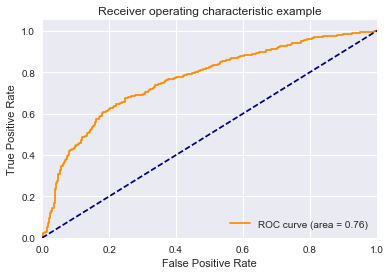

Area Under the ROC Curve is  0.76428304705


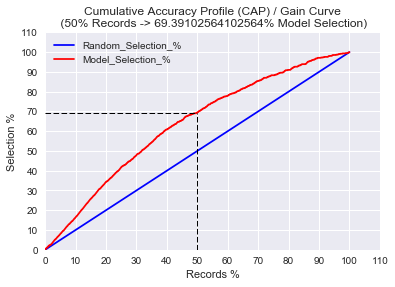

KNN
[[599  19]
 [503 121]]
             precision    recall  f1-score   support

          0       0.54      0.97      0.70       618
          1       0.86      0.19      0.32       624

avg / total       0.70      0.58      0.51      1242



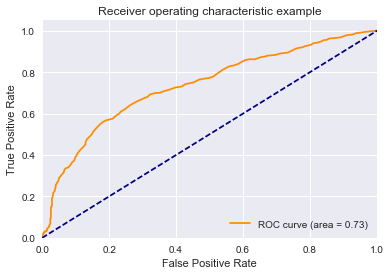

Area Under the ROC Curve is  0.734482615551


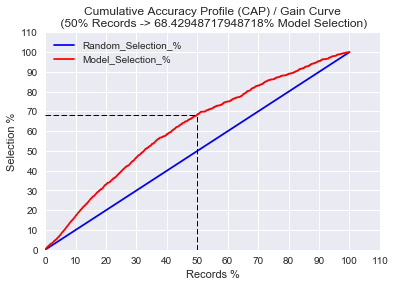

Random Forrest
[[516 102]
 [212 412]]
             precision    recall  f1-score   support

          0       0.71      0.83      0.77       618
          1       0.80      0.66      0.72       624

avg / total       0.76      0.75      0.75      1242



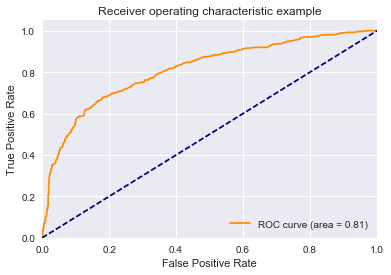

Area Under the ROC Curve is  0.811553501784


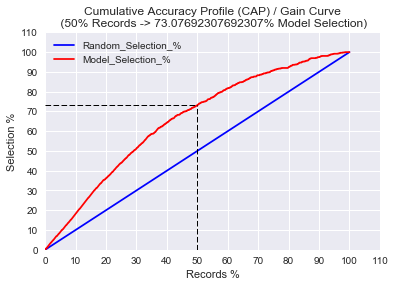

Decision Tree
[[417 201]
 [251 373]]
             precision    recall  f1-score   support

          0       0.62      0.67      0.65       618
          1       0.65      0.60      0.62       624

avg / total       0.64      0.64      0.64      1242



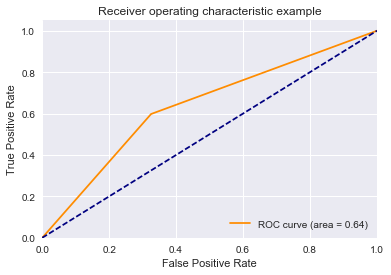

Area Under the ROC Curve is  0.636256845905


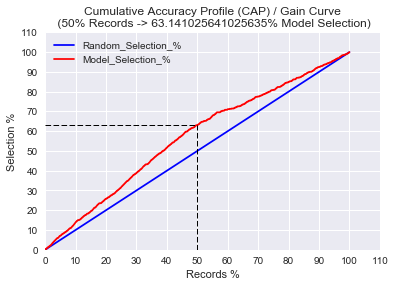

Naive Bayes
[[  8 610]
 [  6 618]]
             precision    recall  f1-score   support

          0       0.57      0.01      0.03       618
          1       0.50      0.99      0.67       624

avg / total       0.54      0.50      0.35      1242



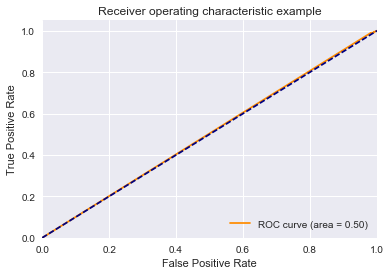

Area Under the ROC Curve is  0.504081611485


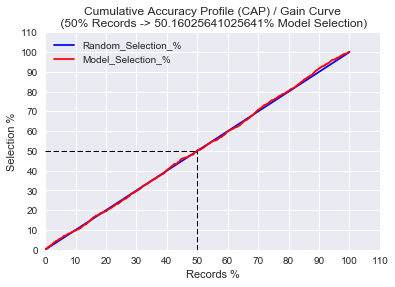

SVM with kernel
[[519  99]
 [284 340]]
             precision    recall  f1-score   support

          0       0.65      0.84      0.73       618
          1       0.77      0.54      0.64       624

avg / total       0.71      0.69      0.68      1242



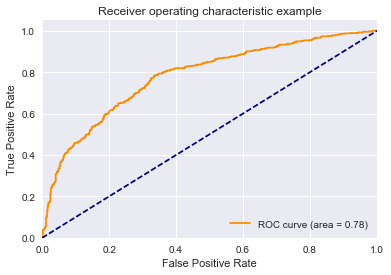

Area Under the ROC Curve is  0.779032860344


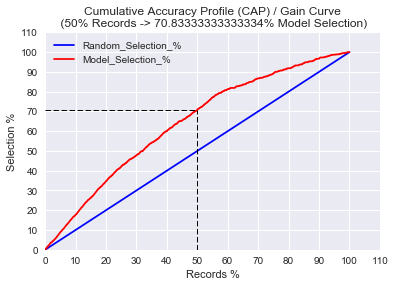

In [28]:
#1) Binary Logistic regression 
print ('Logistic Regression Binary')

#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

#CAP CURVE 
#Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)

#------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------


#2) KNN
print ('KNN')

#Importing logistic resgression and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
model.fit(x_train,y_train)

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)



#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

#3) Random Forrest
print ('Random Forrest')

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])
#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)

#--------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

#4) Decision Tree
print ('Decision Tree')

#Importing logistic resgression and fitting it to data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
model.fit(x_train,y_train)

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)


#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

#5) Naive Bayes 
print ('Naive Bayes')

#Importing logistic resgression and fitting it to data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)


#-----------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

#6) SVM with hernel 
print ('SVM with kernel')

#Importing logistic resgression and fitting it to data
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0, probability = True)
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)